# PREDICTING PRICES OF HOUSES USING DECISION TREE

In [128]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [129]:
house=pd.read_csv(r"C:\Users\USE\Downloads\kc_house_train_data - kc_house_train_data.csv")
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
9757,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
9758,7936000429,20150326T000000,1010000.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
9759,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [130]:
house=pd.read_csv(r"C:\Users\USE\Downloads\kc_house_train_data - kc_house_train_data.csv")
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
9757,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
9758,7936000429,20150326T000000,1010000.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
9759,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [131]:
house.drop(["sqft_living15", "sqft_lot15"], axis = 1, inplace = True)
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
1,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288
9757,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167
9758,7936000429,20150326T000000,1010000.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398
9759,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299


Questions we would try to answer using this dat set are

1 : How is price of house related to living area. According to our assumption these are directly proportional to each other

2: How does lot area affects the price of the house

3 : Does having a water front affects the price of house .

4 : We are assuming that having more bedrooms, more bathrooms increase the price of the house

5 : Are houses from a particular locality or a particular location being priced higher than other houses 

### Analyzing the data using UNIVARIATE ANALYSIS

In [132]:
house['floors'].value_counts()

1.0    4862
2.0    3723
1.5     867
3.0     245
2.5      62
3.5       2
Name: floors, dtype: int64

In [133]:
house['waterfront'].value_counts()

0    9679
1      82
Name: waterfront, dtype: int64

In [134]:
house['view'].value_counts()

0    8748
2     454
3     243
1     160
4     156
Name: view, dtype: int64

In [135]:
house['grade'].value_counts()

7     4067
8     2707
9     1192
6      914
10     532
11     172
5      107
12      45
4       17
13       7
1        1
Name: grade, dtype: int64

In [136]:
house['condition'].value_counts()

3    6291
4    2610
5     772
2      78
1      10
Name: condition, dtype: int64

In [137]:
house['bedrooms'].value_counts()

3     4417
4     3094
2     1255
5      755
6      116
1       88
7       17
8        7
0        6
9        3
11       1
10       1
33       1
Name: bedrooms, dtype: int64

In [138]:
house['zipcode'].value_counts()

98115    278
98052    264
98034    257
98103    257
98117    257
        ... 
98010     48
98109     44
98024     37
98148     26
98039     20
Name: zipcode, Length: 70, dtype: int64

E:\python_files\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yr_built', ylabel='Density'>

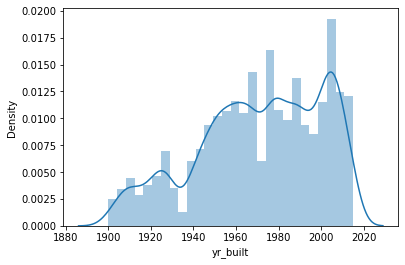

In [139]:
sns.distplot(house.yr_built)

E:\python_files\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_lot', ylabel='Density'>

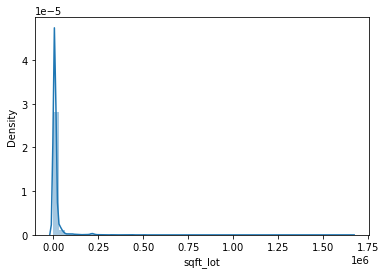

In [140]:
sns.distplot(house.sqft_lot)

E:\python_files\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

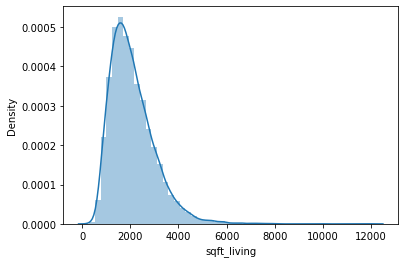

In [141]:
sns.distplot(house.sqft_living)

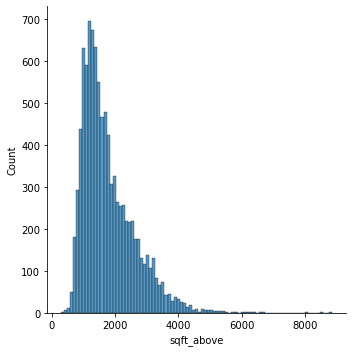

In [142]:
sns.displot(house.sqft_above)

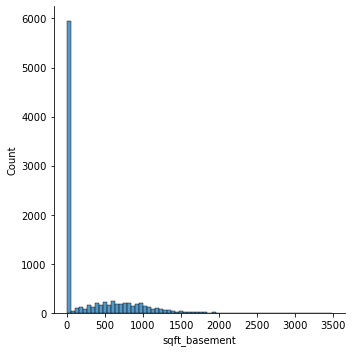

In [143]:
sns.displot(house.sqft_basement)

## BIVARIATE ANALYSIS

### Plot between Living area and price

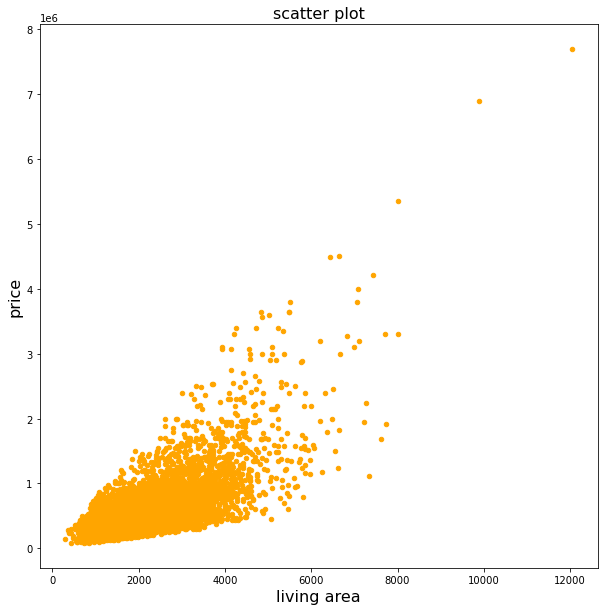

In [144]:
house.plot(kind='scatter',         # type of plot to be plotted
         x='sqft_living',y='price',      # the variable in xand y
         color='orange',
         figsize=(10,10))
plt.xlabel("living area",fontsize=16)
plt.ylabel("price",fontsize=16)
plt.title("scatter plot",fontsize=16)
plt.show()

### Plot between Lot area and Price

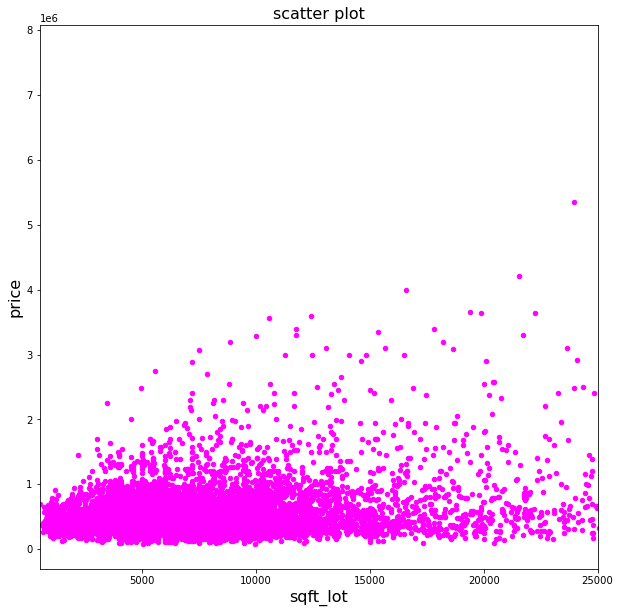

In [145]:
house.plot(kind='scatter',         # type of plot to be plotted
         x='sqft_lot',y='price',      # the variable in xand y
         color='magenta',
         figsize=(10,10))
plt.xlabel("sqft_lot",fontsize=16)
plt.ylabel("price",fontsize=16)
plt.xlim( [ 500, 25000 ] ) 
plt.title("scatter plot",fontsize=16)
plt.show()

### Scatter Plot between squarefoot above and price

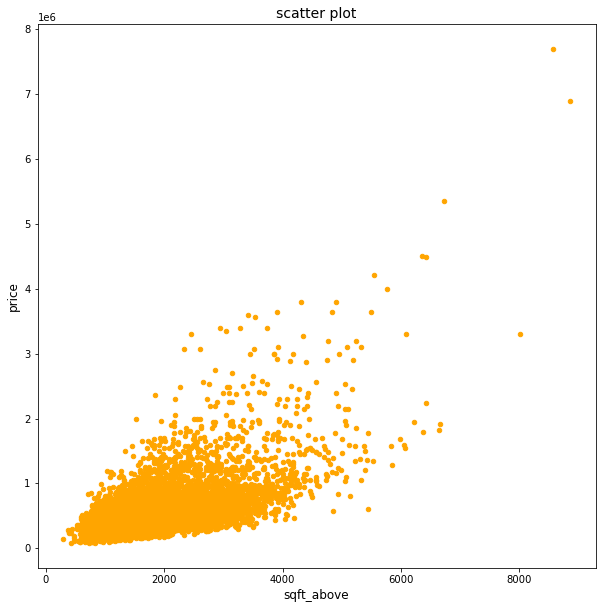

In [146]:
house.plot(kind='scatter',         # type of plot to be plotted
         x='sqft_above',y='price',      # the variable in xand y
         color='orange',
         figsize=(10,10))
plt.xlabel("sqft_above",fontsize=12)
plt.ylabel("price",fontsize=12)
plt.title("scatter plot",fontsize=14)
plt.show()

### Scatter plot between bathrooms and price

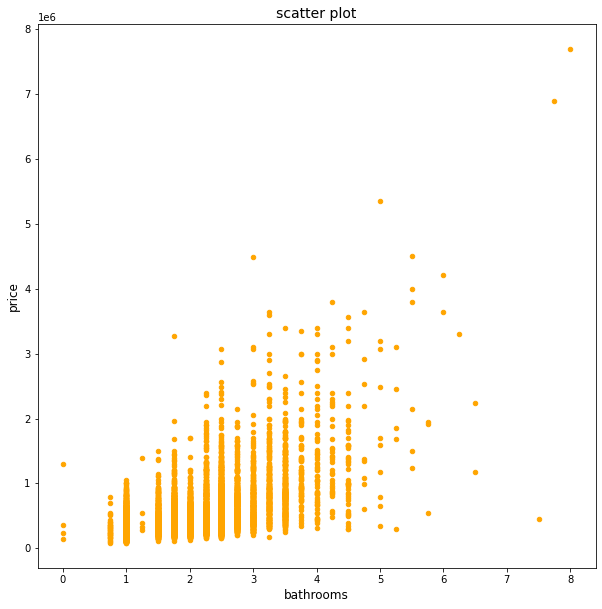

In [147]:
house.plot(kind='scatter',         # type of plot to be plotted
         x='bathrooms',y='price',      # the variable in xand y
         color='orange',
         figsize=(10,10))
plt.xlabel("bathrooms",fontsize=12)
plt.ylabel("price",fontsize=12)
plt.title("scatter plot",fontsize=14)
plt.show()

### Affect of having waterfront on price

<function matplotlib.pyplot.show(close=None, block=None)>

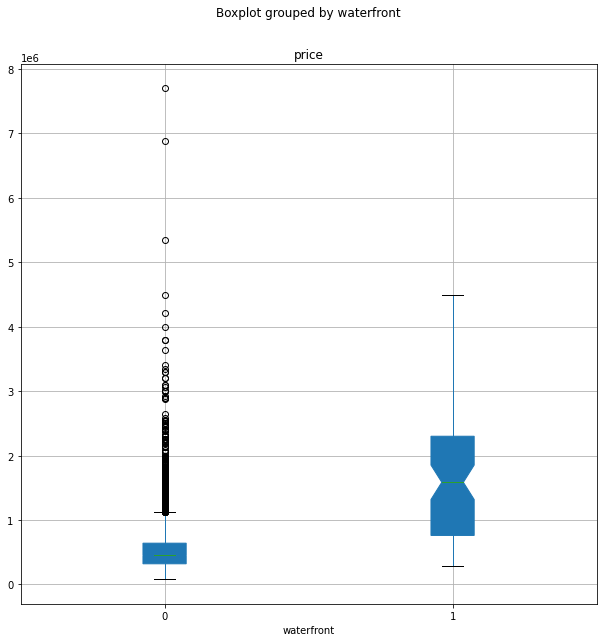

In [148]:
bplot=house.boxplot(column="price",
             notch=True,
             by="waterfront",patch_artist=True,
             grid=True,
             figsize=(10,10))
                              # to plot vertical boxplot
plt.show

### How prices vary according to zip code

<function matplotlib.pyplot.show(close=None, block=None)>

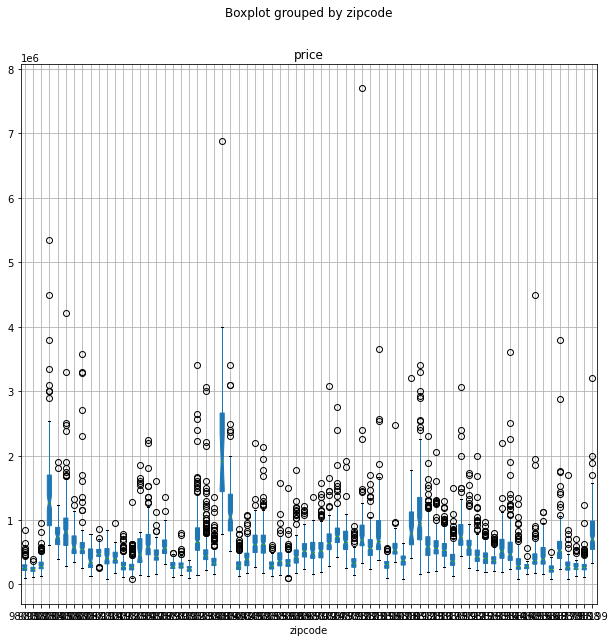

In [149]:

bplot=house.boxplot(column="price",
             notch=True,
             by="zipcode",patch_artist=True,
             grid=True,
             figsize=(10,10))
                              # to plot vertical boxplot
plt.show

### How prices vary according to zip code``

<function matplotlib.pyplot.show(close=None, block=None)>

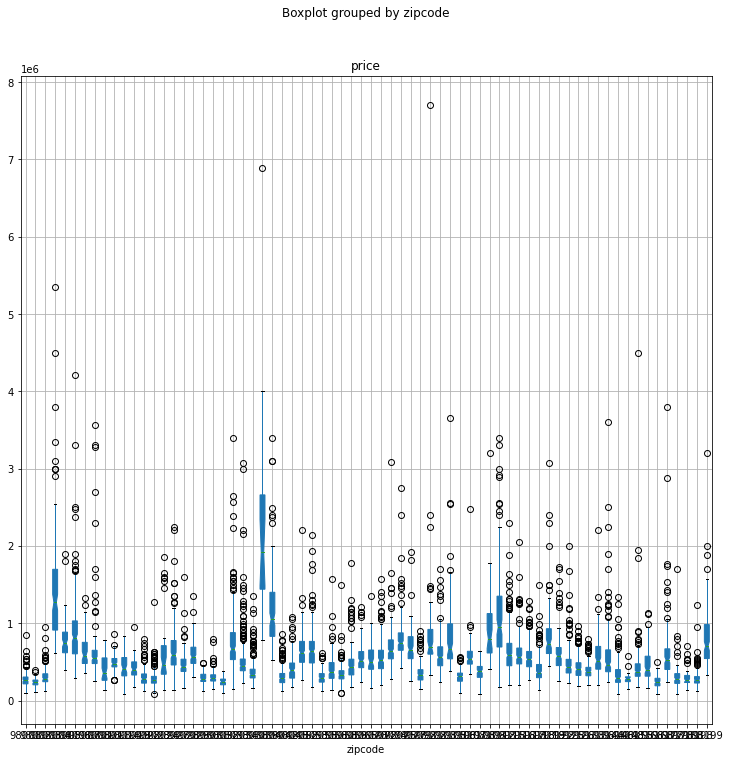

In [150]:

bplot=house.boxplot(column="price",
             notch=True,
             by="zipcode",patch_artist=True,
             grid=True,
             figsize=(12,12))
                              # to plot vertical boxplot
plt.show

### Scatter plot between lat long showing price using gradient colouring

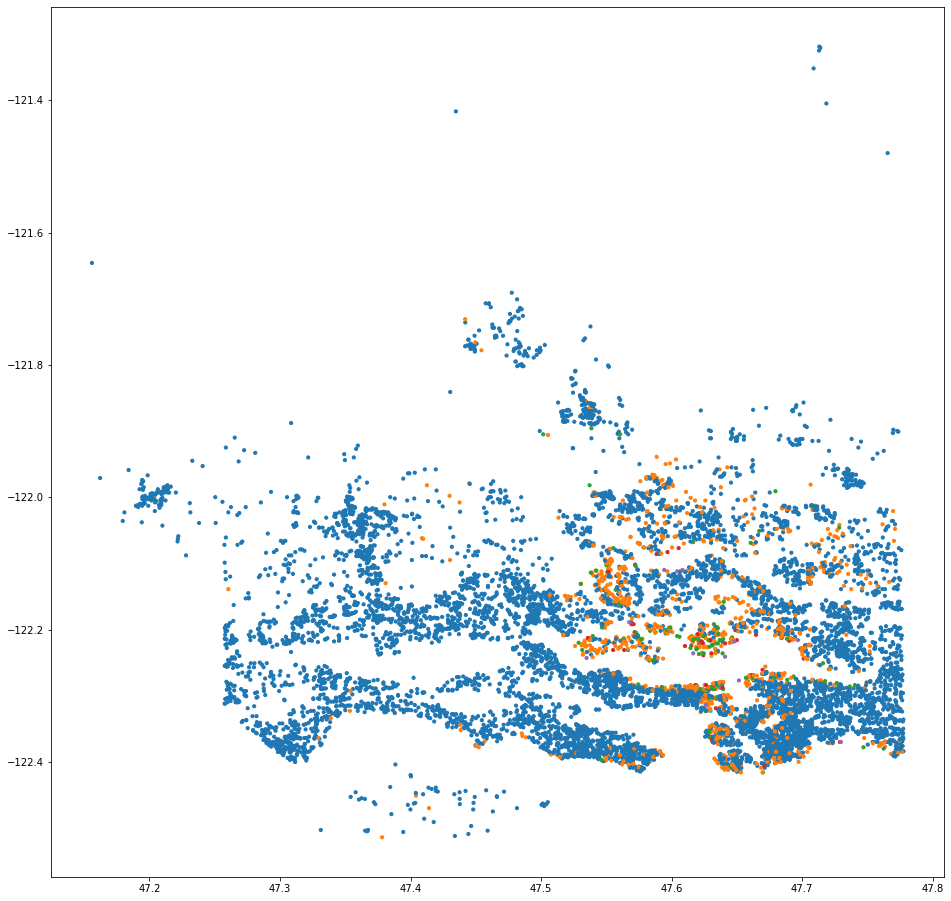

In [151]:
plt.subplots(figsize=(16,16))
plt.scatter(house.lat, house.long, s=10, c=house.price, cmap='tab10')

### Conclusion

*We see that sqft_living,living_area,sqft_above,bathrooms look directly proportional to the price of the house.

*And also from the boxplot we can see that houses having waterfront are having higher average price than house with waterfront.

*From the scater plot between lat and longitude the prices are shown according to gradient colour coding so it looks like house 
of similar price are together located.Also some zipcodes are having higher average prices than other which are clearly visible



## Initial Model Fitting

From our Exploratory Data Analysis we can see that som factors are affecting price of hous very much ie they are directly 

to the price of the house whereas some foctors are having very little or no effect on price of house. So based on that we

are going to take 3 set of predictors

1: grade,lat,long,zipcode,waterfront,view,age_of_house

2:all_columns-(date,id,price)

3:bedrooms,bathrooms,sqft_living,sqft_above,sqft_basemen,sqft_lot,`floors

### FIRST MODEL

In [152]:
X = house.drop(["price","date","id"], axis=1)

y = house.price

In [153]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [154]:
(X_train,X_test,y_train,y_test)=train_test_split(X,y,test_size=0.3)

In [155]:
X_scaled = X.apply(lambda x: (x - np.mean(x)) / np.std(x))

In [156]:
reg_tree = DecisionTreeRegressor(max_depth=12, min_samples_leaf=5) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=12, min_samples_leaf=5)

In [157]:
y_pred = reg_tree.predict(X_test)
y_pred

array([937740.        , 267771.42857143, 437771.36363636, ...,
       497474.69072165, 337196.66666667, 495489.65656566])

In [158]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
np.mean(cross_val_score(dt, X, y, cv = 10))

0.7226434598468645

In [159]:
# MAPE
np.mean(np.abs(y_test - y_pred)/y_test)*100

17.664627386434933

### SECOND MODEL

In [160]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [161]:
X=house[[  'grade','lat','long','zipcode','waterfront','view']]
y=house.price

In [162]:
(X_train,X_test,y_train,y_test)=train_test_split(X,y,test_size=0.3)

In [163]:
X_scaled = X.apply(lambda x: (x - np.mean(x)) / np.std(x))

In [164]:
reg_tree = DecisionTreeRegressor(max_depth=12, min_samples_leaf=5) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=12, min_samples_leaf=5)

In [165]:
y_pred = reg_tree.predict(X_test)
y_pred

array([623526.88554217, 277290.66935484, 244372.22222222, ...,
       606560.        , 265748.48484848, 538166.66666667])

In [166]:
dt = DecisionTreeRegressor()
np.mean(cross_val_score(dt, X, y, cv = 10))

0.6886553943001914

In [167]:
# MAPE
np.mean(np.abs(y_test - y_pred)/y_test)*100

19.678278542899086

### THIRD MODEL

In [168]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [169]:
X=house[[ 'bedrooms','bathrooms',"sqft_living" ,"grade","lat","waterfront",'sqft_above']]
y=house.price

In [170]:
(X_train,X_test,y_train,y_test)=train_test_split(X,y,test_size=0.3)

In [171]:
X_scaled = X.apply(lambda x: (x - np.mean(x)) / np.std(x))

In [172]:
reg_tree = DecisionTreeRegressor(max_depth=20, min_samples_leaf=10) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=10)

In [173]:
y_pred = reg_tree.predict(X_test)
y_pred

array([598972.72727273, 298281.81818182, 406740.        , ...,
       772425.        , 484720.        , 694590.90909091])

In [174]:
dt = DecisionTreeRegressor()
np.mean(cross_val_score(dt, X, y, cv = 10))

0.6071094467892741

In [175]:
# MAPE
np.mean(np.abs(y_test - y_pred)/y_test)*100

20.30272533359461

In [176]:
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
1,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288
9757,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167
9758,7936000429,20150326T000000,1010000.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398
9759,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299


## Step 4 : FEATURE ENGINEERING

In [177]:
# GETTING EXACT DATE
house["date"]= pd.to_datetime(house["date"])


In [178]:
house["year"] = pd.DatetimeIndex(house["date"]).year

In [179]:
# Calculating the age of house usinf its year build
house["age_of_house"] = house['year'] - house['yr_built']

In [180]:
# creating a new column
house['sqft_living**2']=house['sqft_living']**2

In [181]:
house['basement']=house['sqft_basement'].apply(lambda x:1 if x>0 else 0)
house['renovated']=house['yr_renovated'].apply(lambda x:1 if x>0 else 0)
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,year,age_of_house,sqft_living**2,basement,renovated
0,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,2014,49,3841600,1,0
1,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0,0,...,2001,0,98053,47.6561,-122.005,2014,13,29376400,1,0
2,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,...,1942,0,98115,47.6900,-122.292,2014,72,1345600,1,0
3,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,...,1927,0,98028,47.7558,-122.229,2014,87,2044900,0,0
4,6054650070,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,...,1977,0,98074,47.6127,-122.045,2014,37,1876900,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,9834201367,2015-01-26,429000.0,3,2.00,1490,1126,3.0,0,0,...,2014,0,98144,47.5699,-122.288,2015,1,2220100,0,0
9757,3448900210,2014-10-14,610685.0,4,2.50,2520,6023,2.0,0,0,...,2014,0,98056,47.5137,-122.167,2014,0,6350400,0,0
9758,7936000429,2015-03-26,1010000.0,4,3.50,3510,7200,2.0,0,0,...,2009,0,98136,47.5537,-122.398,2015,6,12320100,1,0
9759,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,2009,0,98144,47.5944,-122.299,2014,5,1040400,0,0


In [182]:
np.unique(house.zipcode)

array([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
       98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029,
       98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042,
       98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
       98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,
       98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119,
       98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155,
       98166, 98168, 98177, 98178, 98188, 98198, 98199], dtype=int64)

In [183]:
# As zipcode is a nominal variable its significance is not that much .
# now instead of choosing zipcode we are going to group all the data based on zipcode and going to provide each zipcode with
# average house price.
# grouping zipcodes based on average prices in that area
z=house[["zipcode","price"]].groupby(["zipcode"]).mean()
z.head(5)

,price
zipcode,
98001,2.799354e+05
98002,2.350487e+05
98003,3.098921e+05
98004,1.434533e+06
98005,7.850699e+05


In [184]:
# sorting them in increasing order of price
zs= z.sort_values(
    by="price",
    ascending=True)
zs

,price
zipcode,
98002,2.350487e+05
98168,2.396494e+05
98032,2.427836e+05
98001,2.799354e+05
98023,2.869190e+05
...,...
98102,9.405911e+05
98112,1.141807e+06
98040,1.187555e+06


In [185]:
# adding another column so that this data can be merged with original data set
zs["zipcode"]=zs.index
zs

,price,zipcode
zipcode,,
98002,2.350487e+05,98002
98168,2.396494e+05,98168
98032,2.427836e+05,98032
98001,2.799354e+05,98001
98023,2.869190e+05,98023
...,...,...
98102,9.405911e+05,98102
98112,1.141807e+06,98112
98040,1.187555e+06,98040


In [186]:
# assigning numbers to zipcodes
num=[]
for i in  range(1,71):
    g=i
    num.append(g)
num=np.array(num)

In [187]:
zs["num"]=num
zs

,price,zipcode,num
zipcode,,,
98002,2.350487e+05,98002,1
98168,2.396494e+05,98168,2
98032,2.427836e+05,98032,3
98001,2.799354e+05,98001,4
98023,2.869190e+05,98023,5
...,...,...,...
98102,9.405911e+05,98102,66
98112,1.141807e+06,98112,67
98040,1.187555e+06,98040,68


In [188]:
zs.drop("price",axis=1,inplace=True)

In [189]:
# dropping the index column named "zipcode"
zs.reset_index(drop = True, inplace = True)

In [190]:
# merging two tables
house=house.merge(zs,on="zipcode",how="outer")

In [191]:
# checking if all zipcodes have been included
house['num'].value_counts()

48    278
51    264
37    257
43    257
39    257
     ... 
25     48
65     44
49     37
6      26
70     20
Name: num, Length: 70, dtype: int64

In [192]:

house


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,year,age_of_house,sqft_living**2,basement,renovated,num
0,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,2014,49,3841600,1,0,41
1,9169600135,2014-10-27,525000.0,3,1.50,1350,6000,1.0,0,2,...,0,98136,47.5275,-122.391,2014,64,1822500,1,0,41
2,9238901420,2015-02-02,442000.0,3,1.00,1190,5100,1.0,0,0,...,0,98136,47.5346,-122.385,2015,74,1416100,1,0,41
3,2490200320,2015-03-20,545000.0,3,1.75,1680,6200,1.5,0,0,...,0,98136,47.5338,-122.384,2015,99,2822400,0,0,41
4,2349300060,2015-02-12,200000.0,4,2.00,1920,4822,1.0,0,0,...,0,98136,47.5507,-122.381,2015,101,3686400,1,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,3262300555,2014-07-08,2460000.0,4,5.25,6500,14986,2.0,0,0,...,0,98039,47.6304,-122.236,2014,13,42250000,1,0,70
9757,5427100150,2014-06-26,1410000.0,4,2.25,3250,16684,2.0,0,0,...,0,98039,47.6334,-122.229,2014,35,10562500,0,0,70
9758,3625049042,2014-10-11,3640000.0,5,6.00,5490,19897,2.0,0,0,...,0,98039,47.6165,-122.236,2014,9,30140100,0,0,70
9759,2525049113,2014-07-25,1950000.0,4,3.50,4065,18713,2.0,0,0,...,0,98039,47.6209,-122.237,2014,27,16524225,0,0,70


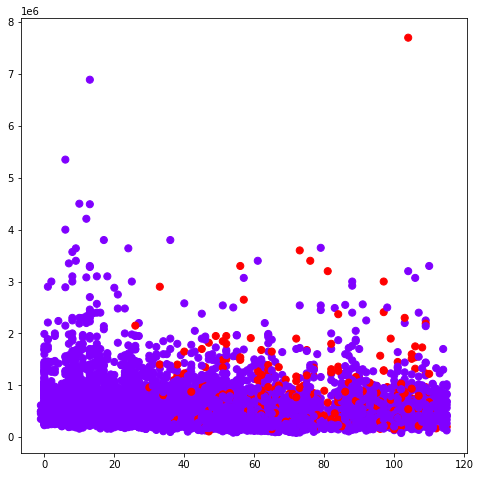

In [193]:
plt.subplots(figsize=(8,8))
plt.scatter(house.age_of_house, house.price, s=50, c=house.renovated, cmap='rainbow')

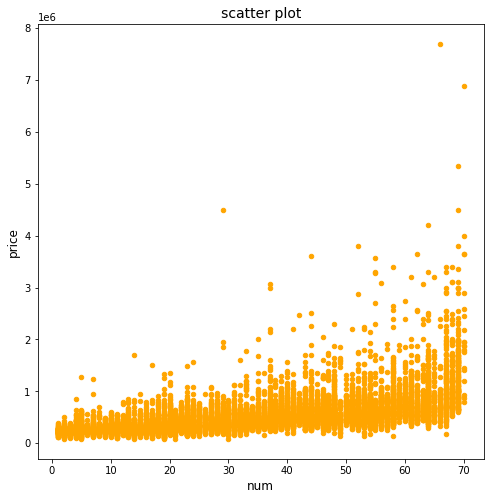

In [194]:
house.plot(kind='scatter',         # type of plot to be plotted
         x='num',y='price',      # the variable in xand y
         color='orange',
         figsize=(8,8))
plt.xlabel("num",fontsize=12)
plt.ylabel("price",fontsize=12)
plt.title("scatter plot",fontsize=14)
plt.show()

## Step 5: MODEL FITTING STEP 2

In [195]:
X =house.drop(['price','id','date','zipcode','sqft_living'],axis=1)
y =house.price

### Train-Test-Validation split

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [197]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25)

### Fitting a Regression Tree

In [198]:
reg_tree = DecisionTreeRegressor(max_depth=9, min_samples_leaf=5) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=5)

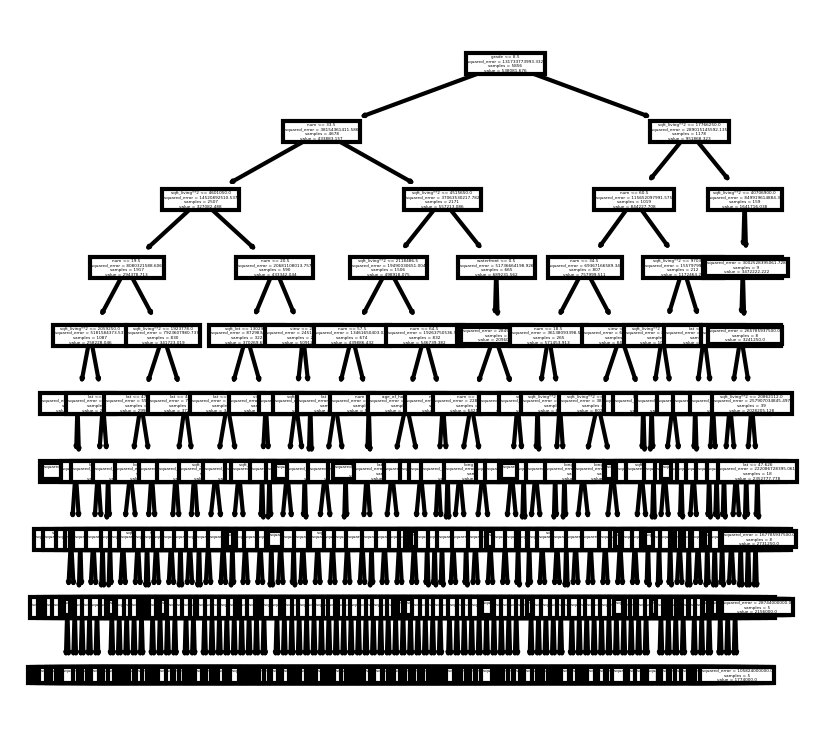

In [199]:
fig, axes = plt.subplots(figsize=(3,3), dpi=300)

tree.plot_tree(reg_tree, feature_names=list(X), filled = False)

plt.show()

### Predicting 

In [200]:
y_pred = reg_tree.predict(X_valid)
y_pred

array([ 204789.36      ,  621500.75510204,  174723.79710145, ...,
       1283703.7037037 ,  559393.54893617,  498468.81081081])

In [202]:
np.mean(np.abs(y_valid - y_pred)/y_valid)*100


17.069927131744105

After feature engineering error reduces a bit.

### Choosing the best depth

In [76]:
depth = np.arange(1,15)
mae = []

for k in depth:
    reg_tree = DecisionTreeRegressor(max_depth=k, min_samples_leaf=5)
    reg_tree.fit(X_train, y_train)
    y_pred = reg_tree.predict(X_valid)
    mae.append(np.mean(np.abs(y_valid - y_pred)))

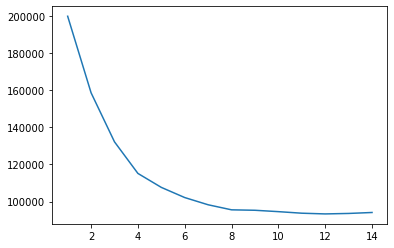

In [77]:
plt.plot(depth, np.array(mae))
plt.show()

As we can see that even if we take depth as 10 we would get almost similar accuracy as if we were to increase the depth

## Step 6 : Model Testing

In [204]:

house_test=pd.read_csv(r"C:\Users\USE\Downloads\kc_house_test_data - kc_house_test_data.csv")
house_test

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
1,1175000570,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850
2,16000397,20141205T000000,189000.0,2,1.00,1200,9850,1.0,0,0,...,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095
3,461000390,20140624T000000,687500.0,4,1.75,2330,5000,1.5,0,0,...,7,1510,820,1929,0,98117,47.6823,-122.368,1460,5000
4,7895500070,20150213T000000,240000.0,4,1.00,1220,8075,1.0,0,0,...,7,890,330,1969,0,98001,47.3341,-122.282,1290,7800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,6669080120,20141215T000000,405000.0,4,2.50,1980,5020,2.0,0,0,...,7,1980,0,2007,0,98056,47.5147,-122.190,1980,5064
2213,2855000110,20140808T000000,388000.0,3,2.50,2198,6222,2.0,0,2,...,8,2198,0,2010,0,98198,47.3906,-122.304,2198,7621
2214,3345700207,20150502T000000,608500.0,4,3.50,2850,5577,2.0,0,0,...,8,1950,900,2014,0,98056,47.5252,-122.192,2850,5708
2215,6056111067,20140707T000000,230000.0,3,1.75,1140,1201,2.0,0,0,...,8,1140,0,2014,0,98108,47.5637,-122.295,1210,1552


In [205]:
# now we are going to perform all the steps on the test data that we performed on training data

house_test.drop(["sqft_living15", "sqft_lot15"], axis = 1, inplace = True)

house_test["date"]= pd.to_datetime(house_test["date"])
house_test["year"] = pd.DatetimeIndex(house_test["date"]).year

house_test["age_of_house"] = house_test['year'] - house_test['yr_built']

house_test['sqft_living**2']=house_test['sqft_living']**2

house_test['basement']=house_test['sqft_basement'].apply(lambda x:1 if x>0 else 0)

house_test['renovated']=house_test['yr_renovated'].apply(lambda x:1 if x>0 else 0)
house_test

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,year,age_of_house,sqft_living**2,basement,renovated
0,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,2003,0,98038,47.3684,-122.031,2015,12,3572100,0,0
1,1175000570,2015-03-12,530000.0,5,2.00,1810,4850,1.5,0,0,...,1900,0,98107,47.6700,-122.394,2015,115,3276100,0,0
2,16000397,2014-12-05,189000.0,2,1.00,1200,9850,1.0,0,0,...,1921,0,98002,47.3089,-122.210,2014,93,1440000,0,0
3,461000390,2014-06-24,687500.0,4,1.75,2330,5000,1.5,0,0,...,1929,0,98117,47.6823,-122.368,2014,85,5428900,1,0
4,7895500070,2015-02-13,240000.0,4,1.00,1220,8075,1.0,0,0,...,1969,0,98001,47.3341,-122.282,2015,46,1488400,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,6669080120,2014-12-15,405000.0,4,2.50,1980,5020,2.0,0,0,...,2007,0,98056,47.5147,-122.190,2014,7,3920400,0,0
2213,2855000110,2014-08-08,388000.0,3,2.50,2198,6222,2.0,0,2,...,2010,0,98198,47.3906,-122.304,2014,4,4831204,0,0
2214,3345700207,2015-05-02,608500.0,4,3.50,2850,5577,2.0,0,0,...,2014,0,98056,47.5252,-122.192,2015,1,8122500,1,0
2215,6056111067,2014-07-07,230000.0,3,1.75,1140,1201,2.0,0,0,...,2014,0,98108,47.5637,-122.295,2014,0,1299600,0,0


In [206]:
z=house_test[["zipcode","price"]].groupby(["zipcode"]).mean()

zs= z.sort_values(
    by="price",
    ascending=True)

zs["zipcode"]=zs.index

num=[]
for i in  range(1,71):
    g=i
    num.append(g)
num=np.array(num)

zs["num"]=num

zs.drop("price",axis=1,inplace=True)

zs.reset_index(drop = True, inplace = True)

house=house_test.merge(zs,on="zipcode",how="outer")

In [207]:
X =house_test.drop(["price","id","date"],axis=1)
y =house_test.price

### Test-Train-Validation Split

In [208]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [210]:
X_scaled = X.apply(lambda x: (x - np.mean(x)) / np.std(x))

In [211]:
#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25)

### Fitting A Regression Tree

In [212]:
reg_tree = DecisionTreeRegressor(max_depth=10) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

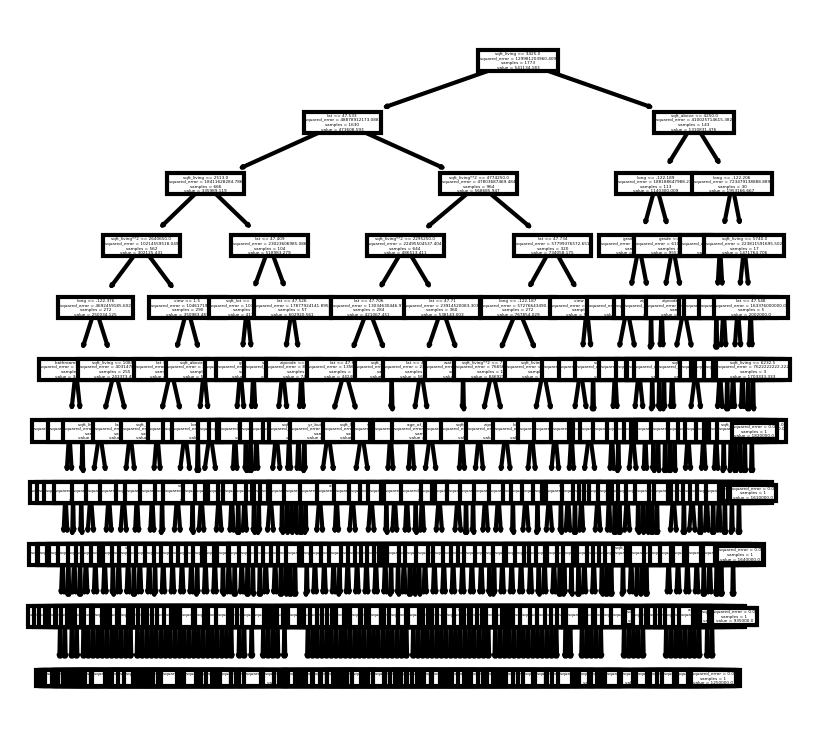

In [213]:
fig, axes = plt.subplots(figsize=(3,3), dpi=300)

tree.plot_tree(reg_tree, feature_names=list(X), filled = False)

plt.show()

### Predicting

In [214]:
y_pred = reg_tree.predict(X_test)
y_pred

array([ 265497.40909091,  539987.5       ,  452043.73076923,
        382500.        , 1040000.        ,  182660.        ,
        374000.        ,  323440.38596491,  300521.09090909,
        213301.47058824,  704245.375     ,  167912.5       ,
        517078.25531915,  704245.375     ,  452043.73076923,
        673954.34782609,  508860.24074074,  467693.33333333,
        673954.34782609,  262031.81818182,  780000.        ,
        338173.17241379,  321000.        ,  427778.8       ,
        659286.66666667,  898809.4516129 ,  313231.55555556,
        338173.17241379,  262031.81818182,  312084.38461538,
        410613.73333333,  481950.        ,  601461.47368421,
        334941.        ,  355990.        ,  508860.24074074,
        419054.5       ,  355990.        ,  557155.        ,
        555727.27272727,  407759.78571429,  937500.        ,
        418750.        ,  518200.        ,  553371.875     ,
        517078.25531915,  251125.        ,  213301.47058824,
        156868.75      ,

In [216]:
# MAPE
np.mean(np.abs(y_test - y_pred)/y_test)*100

16.333689356200107

As we can see that our error has further reduced after fitting it with optimal depth